## **1.0 Linear Regression**

### *a. Load dataset*

In [1]:
import pandas as pd

df = pd.read_csv('./SalesPrediction.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [3]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [4]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### *b. Preprocessing*

In [6]:
# Q9
df = pd.get_dummies(df)

In [7]:
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [8]:
df.isnull().sum()

TV                  10
Radio                4
Social Media         6
Sales                6
Influencer_Macro     0
Influencer_Mega      0
Influencer_Micro     0
Influencer_Nano      0
dtype: int64

In [9]:
new_df = df.fillna(0)

In [10]:
new_df.isnull().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

In [11]:
df.mean()

TV                   54.066857
Radio                18.160356
Social Media          3.323956
Sales               192.466602
Influencer_Macro      0.245407
Influencer_Mega       0.253281
Influencer_Micro      0.252187
Influencer_Nano       0.249125
dtype: float64

In [12]:
df = df.fillna(df.mean())

In [13]:
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,0.021335,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,0.009518,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.011631,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,0.019267,-0.011701,-0.004099,-0.003289
Influencer_Macro,0.021335,0.009518,0.011631,0.019267,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.328482,-0.335465,-0.334495,1.000000


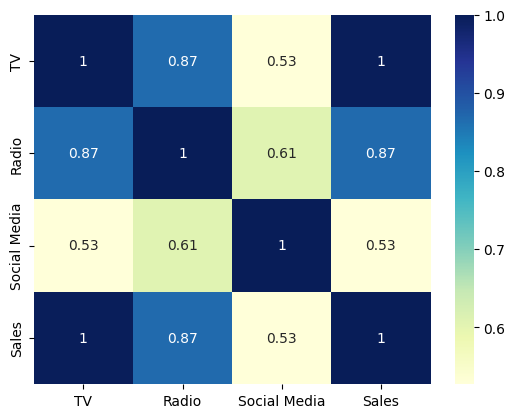

In [14]:
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

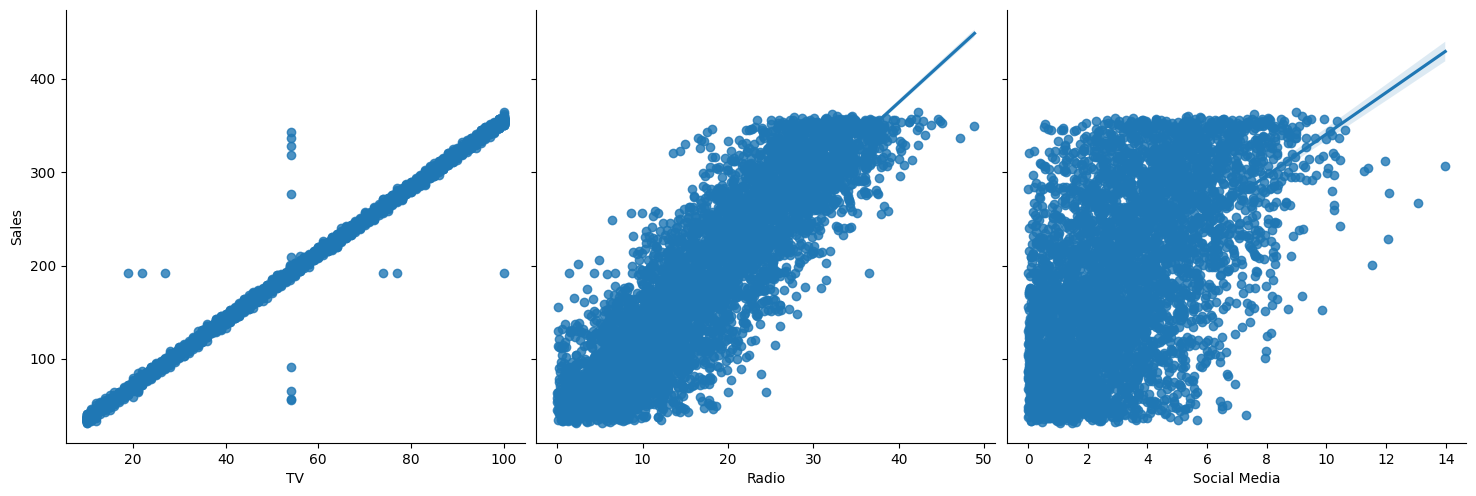

In [15]:
sns.pairplot(data = df,
    x_vars = ['TV', 'Radio', 'Social Media'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

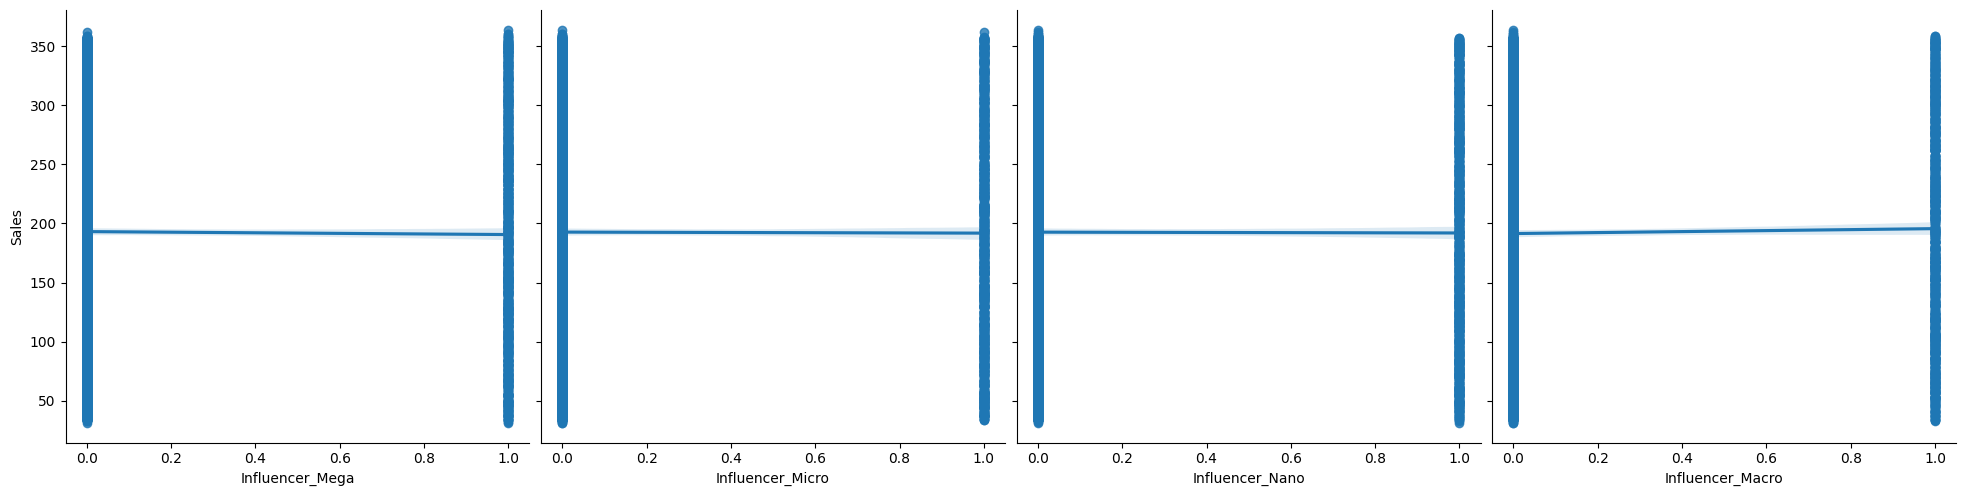

In [16]:
sns.pairplot(data = df,
    x_vars = ['Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Influencer_Macro'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

In [17]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [18]:
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]
X

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,False,True,False,False
1,13.0,9.237765,2.409567,False,True,False,False
2,41.0,15.886446,2.913410,False,True,False,False
3,83.0,30.020028,6.922304,False,True,False,False
4,15.0,8.437408,1.405998,False,False,True,False
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,False,False,True,False
4568,71.0,20.610685,6.545573,False,False,False,True
4569,44.0,19.800072,5.096192,False,False,True,False
4570,71.0,17.534640,1.940873,True,False,False,False


In [19]:
y = df[['Sales']]
y

,Sales
0,54.732757
1,46.677897
2,150.177829
3,298.246340
4,56.594181
...,...
4567,94.685866
4568,249.101915
4569,163.631457
4570,253.610411


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [21]:
X_train.shape, y_train.shape

((3063, 7), (3063, 1))

In [22]:
X_test.shape, y_test.shape

((1509, 7), (1509, 1))

### *c. Feature Scaling*

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [24]:
scaler.mean_

array([54.17357772, 18.22801905,  3.33704144,  0.24779628,  0.25138753,
        0.25008162,  0.25073457])

In [25]:
# Q10:
scaler.mean_[0]

54.173577723283785

In [26]:
scaler.scale_

array([26.0602579 ,  9.62806595,  2.21765947,  0.43173288,  0.43381083,
        0.43305981,  0.43343598])

In [27]:
X_test_processed = scaler.fit_transform(X_test)

In [28]:
X_train_processed

array([[ 0.33869282, -0.3935435 , -0.17228084, ..., -0.57948652,
         1.73167391, -0.57848122],
       [-0.19852366, -0.28899849, -1.47661593, ...,  1.72566569,
        -0.57747593, -0.57848122],
       [-0.42875929, -1.07436552, -0.55865556, ..., -0.57948652,
        -0.57747593,  1.72866459],
       ...,
       [-1.61831007, -1.72922605,  0.58649299, ..., -0.57948652,
        -0.57747593,  1.72866459],
       [-0.58224971, -0.91383556, -1.22645549, ..., -0.57948652,
         1.73167391, -0.57848122],
       [-1.27295662, -1.45779228, -1.04859981, ..., -0.57948652,
         1.73167391, -0.57848122]])

In [29]:
X_test_processed

array([[-0.33831381, -0.09176884, -0.8349793 , ..., -0.58831925,
         1.70271102, -0.57097333],
       [ 0.77025605,  1.17821405, -0.43886714, ..., -0.58831925,
        -0.58729872,  1.75139529],
       [ 1.15252152,  1.04864751,  1.09352839, ...,  1.69975741,
        -0.58729872, -0.57097333],
       ...,
       [ 0.96138879,  1.12388703,  1.09651853, ...,  1.69975741,
        -0.58729872, -0.57097333],
       [-0.4147669 , -0.29991669,  1.2298153 , ...,  1.69975741,
        -0.58729872, -0.57097333],
       [-0.91171201, -1.21956787, -0.31431739, ...,  1.69975741,
        -0.58729872, -0.57097333]])

In [30]:
from sklearn.metrics import r2_score

In [31]:
# Q1, Q2
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = self.X_data.shape[1]

        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)**2
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        if X_data.shape[1] == self.num_features:
            y_pred = X_data.dot(self.theta)
        else:
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # Predict
            y_pred = self.predict(self.X_data)

            # Compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # Compute gradient
            loss_grd = 2*(y_pred-self.y_target)/self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # Update weight
            self.theta = self.theta - self.learning_rate*gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [32]:
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0 - Loss: 45929.5601546677
Epoch: 50 - Loss: 100.19869364406335
Epoch: 100 - Loss: 68.43936695282812
Epoch: 150 - Loss: 65.97278915505488
Epoch: 200 - Loss: 65.78112029262974


{'loss': 574.3588338758382,
 'weight': array([[1.92950605e+02],
        [9.10240453e+01],
        [1.85101651e+00],
        [1.77848718e-01],
        [1.66955027e-01],
        [4.02450890e-01],
        [4.01076076e-01],
        [3.85747642e-01]])}

In [33]:
preds = linear_model.predict(X_test_processed)

In [34]:
preds[:5]

array([[161.96947973],
       [265.27458043],
       [300.12762488],
       [298.21817421],
       [ 75.78545284]])

In [35]:
r2_score(y_test, preds)

0.995034411295606

In [36]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)

LinearRegression()

In [37]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

0.995041305387327

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train_processed)

In [39]:
X_test_poly = poly_features.transform(X_test_processed)

In [40]:
X_train_poly.shape

(3063, 120)

In [41]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [42]:
linear_model = CustomLinearRegression(X_train_poly, y_train, learning_rate=0.01, num_epochs=500)
linear_model.fit()

Epoch: 0 - Loss: 46650.247893409985
Epoch: 50 - Loss: 196.0200045447891
Epoch: 100 - Loss: 119.82547685667268
Epoch: 150 - Loss: 92.0994025110036
Epoch: 200 - Loss: 78.14363035066697
Epoch: 250 - Loss: 70.40855270392
Epoch: 300 - Loss: 65.87668334734197
Epoch: 350 - Loss: 63.09983743457627
Epoch: 400 - Loss: 61.32405233665643
Epoch: 450 - Loss: 60.13799173452086


{'loss': 294.7373910136029,
 'weight': array([[11.54564317],
        [14.25596872],
        [15.41736242],
        [-0.27743181],
        [-0.15714694],
        [ 0.31688792],
        [-0.63931406],
        [ 0.34457215],
        [-0.61508294],
        [ 0.12927728],
        [-0.79333296],
        [-1.41673847],
        [ 0.16379202],
        [ 0.65160259],
        [ 0.19245044],
        [ 0.43880087],
        [ 0.87476529],
        [ 0.66078301],
        [-1.45286856],
        [ 0.2280118 ],
        [-0.66788529],
        [-0.11755294],
        [ 0.63356008],
        [ 0.86001992],
        [ 0.50214551],
        [ 1.27815123],
        [ 1.72222323],
        [12.10771579],
        [-5.88009369],
        [-4.0652698 ],
        [-3.38746344],
        [13.27908686],
        [-5.20896538],
        [-7.37509043],
        [13.47030049],
        [-4.23281045],
        [13.91769819],
        [ 4.57700217],
        [-1.72039784],
        [-1.49420837],
        [ 0.55108224],
        [ 0.7851958

In [43]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9886470991054207

In [44]:
preds[:5]

array([[155.94096713],
       [271.28038371],
       [290.10705735],
       [292.68070644],
       [ 78.20791259]])

In [45]:
y_test[:5]

,Sales
3235,157.656160
1912,264.592233
3656,298.882343
2772,298.639410
130,80.940725


In [46]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9886470991054207

In [47]:
#Q4 case 1
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
r2_score(y_pred, y)

1.0

In [48]:
#Q4 case 2
y_pred = np.array([1 , 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
r2_score(y_pred , y)

-1.2000000000000002

In [49]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array for the data.
        degree: A integer for the degree of
        the generated polynomial function.
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T

In [50]:
X_train_processed[:, 2:3]

array([[-0.17228084],
       [-1.47661593],
       [-0.55865556],
       ...,
       [ 0.58649299],
       [-1.22645549],
       [-1.04859981]])

In [51]:
x_train_poly = create_polynomial_features(X_train_processed[:, 2:3], degree=3)
x_train_poly

array([[-0.17228084,  0.02968069, -0.00511341],
       [-1.47661593,  2.18039462, -3.21960544],
       [-0.55865556,  0.31209604, -0.17435419],
       ...,
       [ 0.58649299,  0.34397403,  0.20173836],
       [-1.22645549,  1.50419307, -1.84482586],
       [-1.04859981,  1.09956157, -1.15300006]])

In [52]:
X_train_poly = np.hstack((X_train_processed, x_train_poly[:, 1:]))
X_train_poly

array([[ 0.33869282, -0.3935435 , -0.17228084, ..., -0.57848122,
         0.02968069, -0.00511341],
       [-0.19852366, -0.28899849, -1.47661593, ..., -0.57848122,
         2.18039462, -3.21960544],
       [-0.42875929, -1.07436552, -0.55865556, ...,  1.72866459,
         0.31209604, -0.17435419],
       ...,
       [-1.61831007, -1.72922605,  0.58649299, ...,  1.72866459,
         0.34397403,  0.20173836],
       [-0.58224971, -0.91383556, -1.22645549, ..., -0.57848122,
         1.50419307, -1.84482586],
       [-1.27295662, -1.45779228, -1.04859981, ..., -0.57848122,
         1.09956157, -1.15300006]])

In [53]:
X_train_poly.shape

(3063, 9)

In [54]:
x_test_poly = create_polynomial_features(X_test_processed[:, 2:3], degree=2)
x_test_poly

array([[-0.8349793 ,  0.69719042],
       [-0.43886714,  0.19260437],
       [ 1.09352839,  1.19580433],
       ...,
       [ 1.09651853,  1.20235288],
       [ 1.2298153 ,  1.51244566],
       [-0.31431739,  0.09879542]])

In [55]:
X_test_poly = np.hstack((X_test_processed, x_test_poly[:, 1:]))
X_test_poly

array([[-0.33831381, -0.09176884, -0.8349793 , ...,  1.70271102,
        -0.57097333,  0.69719042],
       [ 0.77025605,  1.17821405, -0.43886714, ..., -0.58729872,
         1.75139529,  0.19260437],
       [ 1.15252152,  1.04864751,  1.09352839, ..., -0.58729872,
        -0.57097333,  1.19580433],
       ...,
       [ 0.96138879,  1.12388703,  1.09651853, ..., -0.58729872,
        -0.57097333,  1.20235288],
       [-0.4147669 , -0.29991669,  1.2298153 , ..., -0.58729872,
        -0.57097333,  1.51244566],
       [-0.91171201, -1.21956787, -0.31431739, ..., -0.58729872,
        -0.57097333,  0.09879542]])

In [56]:
X_test_poly.shape

(1509, 8)